uni: jl6565

# MNIST Sign Language

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics         import accuracy_score
from sklearn.model_selection import train_test_split

import keras
from keras.utils  import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [69]:
class SignLanguage:
    def __init__(self):
        self.model = None

        self.data = {
            "train": None,
            "test" : None
        }
        self.create_model()

    def create_model(self):
        """
        Create a CNN model and save it to self.model
        """

        # TODO: Create a Sequential model
        model = Sequential()

        # model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
        # model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
        # model.add(Flatten())
        # model.add(Dense(256, activation='relu'))
        # model.add(Dense(25, activation='softmax'))

        model.add(Conv2D(35,
                 kernel_size=(3,3),   ## kernel size nedir
                 activation='relu',
                 input_shape=(28,28,1),
                 strides = 1 ,
                 padding = 'same'))


        model.add(MaxPooling2D(pool_size=(2,2),
                            strides = 2 ,
                            padding = 'same'))

        model.add(Conv2D(50,
                        kernel_size=(3,3),
                        strides=1,
                        padding='same',
                        activation='relu'))

        model.add(Dropout(0.2))


        model.add(MaxPooling2D(pool_size=(2,2),
                            strides=2,
                            padding='same'))
        model.add(Flatten())
        model.add(Dense(units=25,activation='softmax'))

        # TODO: Compile the model with categorical_crossentropy
        model.compile('adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

        self.model = model

    def prepare_data(self, images, labels):
        """
        Use this method to normalize the dataset and split it into train/test.
        Save your data in self.data["train"] and self.data["test"] as a tuple
        of (images, labels)

        :param images numpy array of size (num_examples, 28*28)
        :param labels numpy array of size (num_examples, )
        """
        # TODO : split into training and validation set
        # TODO : reshape each example into a 2D image (28, 28, 1)
        images = images / 255

        train = images.reshape(-1,28,28,1)

        # Convert targets into one-hot encoded format


        train_data,test_data,train_target,test_target=train_test_split(train,labels,test_size=0.2,random_state=0)

        train_target = to_categorical(train_target)
        test_target = to_categorical(test_target)

        self.data = {
            "train": (train_data, train_target), # (x_train, y_train)
            "test" : (test_data, test_target), # (x_test, y_test)
        }




    def train(self, batch_size:int=128, epochs:int=50, verbose:int=1):
        """
        Use model.fit() to train your model. Make sure to return the history for a neat visualization.

        :param batch_size The batch size to use for training
        :param epochs     Number of epochs to use for training
        :param verbose    Whether or not to print training output
        """



        history = self.model.fit(self.data["train"][0], self.data["train"][1], validation_split=0.2, epochs=epochs, batch_size=batch_size, verbose=verbose)

        return history

    def predict(self, data):
        """
        Use the trained model to predict labels for test data.

        :param data: numpy array of test images
        :return a numpy array of test labels. array size = (num_examples, )
        """

        # Don't forget to normalize the data in the same way as training data
        # self.model.predict() and np.argmax( , axis=1) might help
        data = data / 255
        data = data.reshape(-1,28,28,1)

        predicted_classes = np.argmax(self.model.predict(data), axis=1)

        return predicted_classes

    def visualize_data(self, data):
        """
        Visualizing the hand gestures

        :param data: numpy array of images
        """
        if data is None: return

        nrows, ncols = 5, 5
        fig, axs = plt.subplots(nrows, ncols, figsize=(10, 10), sharex=True, sharey=True)
        plt.subplots_adjust(wspace=0, hspace=0)

        for i in range(nrows):
            for j in range(ncols):
                axs[i][j].imshow(data[0][i*ncols+j].reshape(28, 28), cmap='gray')
        plt.show()

    def visualize_accuracy(self, history):
        """
        Plots out the accuracy measures given a keras history object

        :param history: return value from model.fit()
        """
        if history is None: return

        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title("Accuracy")
        plt.xlabel('epoch')
        plt.ylabel('accuracy')
        plt.legend(['train','test'])
        plt.show()

# Grading Script

Do NOT modify this section

In [70]:
if __name__=="__main__":
    train = pd.read_csv('train.csv')
    test  = pd.read_csv('test.csv')

    train_labels, test_labels = train['label'].values, test['label'].values
    train.drop('label', axis=1, inplace=True)
    test.drop('label', axis=1, inplace=True)

    num_classes = test_labels.max() + 1
    train_images, test_images = train.values, test.values

    print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)


(27455, 784) (27455,) (7172, 784) (7172,)


In [71]:
if __name__=="__main__":
    my_model = SignLanguage()
    my_model.prepare_data(train_images, train_labels)


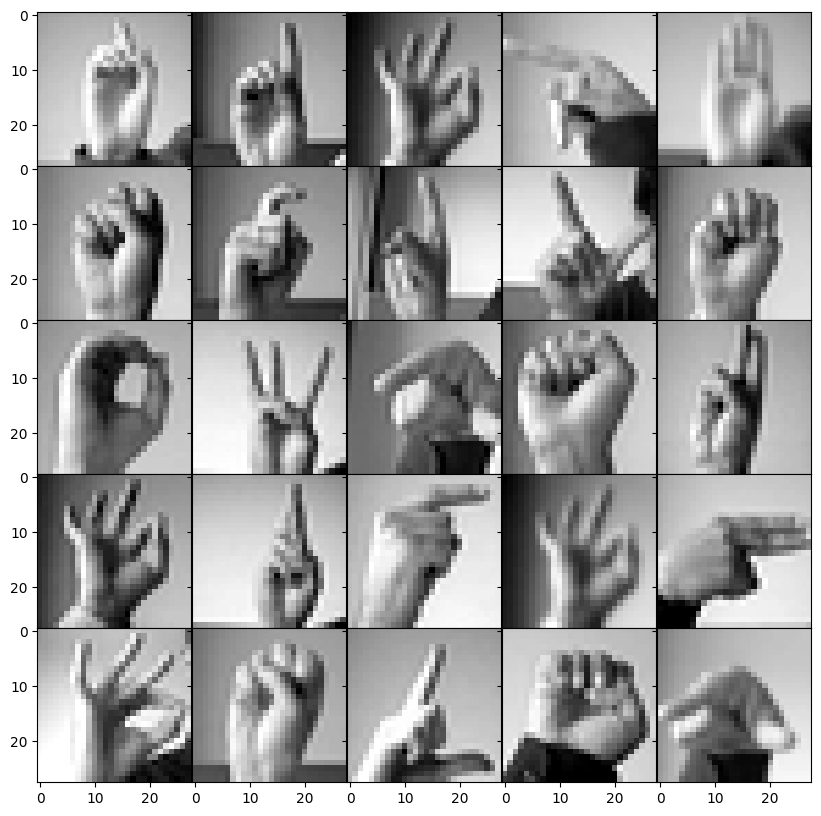

In [72]:
if __name__=="__main__":
    my_model.visualize_data(my_model.data["train"])

Epoch 1/30
138/138 [==============================] - 4s 9ms/step - loss: 2.1307 - accuracy: 0.4029 - val_loss: 0.9918 - val_accuracy: 0.7405
Epoch 2/30
138/138 [==============================] - 1s 7ms/step - loss: 0.5762 - accuracy: 0.8315 - val_loss: 0.3849 - val_accuracy: 0.8985
Epoch 3/30
138/138 [==============================] - 1s 7ms/step - loss: 0.2457 - accuracy: 0.9316 - val_loss: 0.1913 - val_accuracy: 0.9595
Epoch 4/30
138/138 [==============================] - 1s 7ms/step - loss: 0.1175 - accuracy: 0.9723 - val_loss: 0.0949 - val_accuracy: 0.9891
Epoch 5/30
138/138 [==============================] - 1s 8ms/step - loss: 0.0629 - accuracy: 0.9881 - val_loss: 0.0620 - val_accuracy: 0.9943
Epoch 6/30
138/138 [==============================] - 2s 13ms/step - loss: 0.0356 - accuracy: 0.9947 - val_loss: 0.0315 - val_accuracy: 0.9998
Epoch 7/30
138/138 [==============================] - 2s 13ms/step - loss: 0.0202 - accuracy: 0.9982 - val_loss: 0.0209 - val_accuracy: 0.9995
Epoc

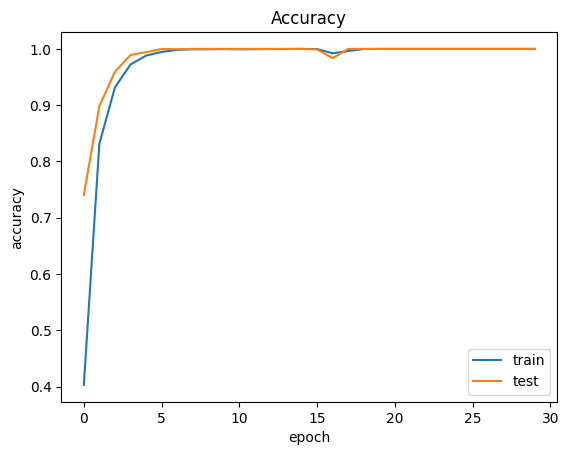

In [73]:
if __name__=="__main__":
    history = my_model.train(epochs=30, verbose=1)
    my_model.visualize_accuracy(history)

In [74]:
if __name__=="__main__":
    y_pred = my_model.predict(test_images)
    accuracy = accuracy_score(test_labels, y_pred)
    print(accuracy)

225/225 [==============================] - 1s 4ms/step
0.9167596207473508
